In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/l1/bbms4_2d4d11v5j0tx9k1w6m0000gn/T/ipykernel_11259/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date


'2017-08-23'

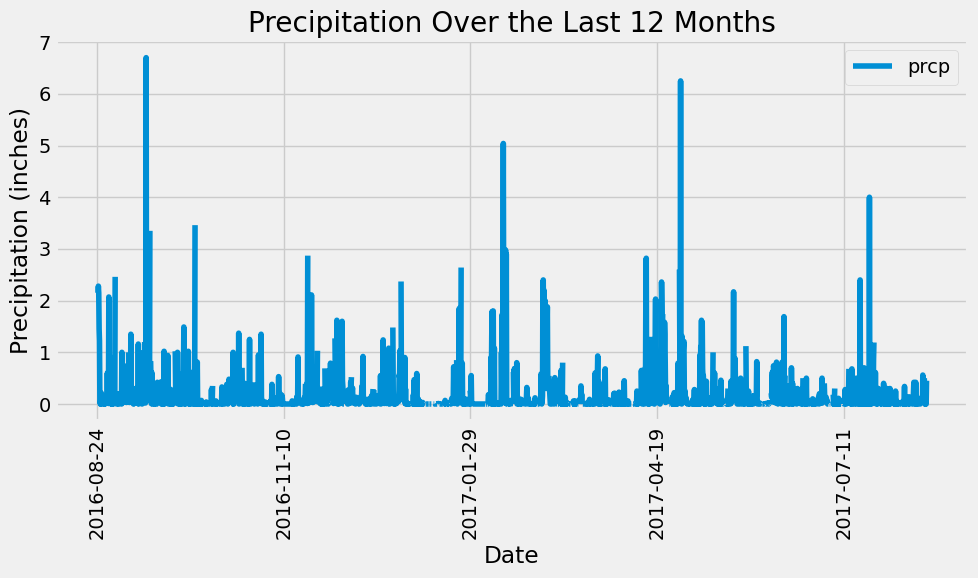

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

precipitation_data= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.set_index('date', inplace=True)
precipitation_df.plot(rot=90, figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Over the Last 12 Months')
plt.tight_layout()
plt.show()




In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df.describe()
print(summary_stats)


              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)


session.query(func.count(Station.station)).all()
    

[(9,)]

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station).label('station_count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Print the results
print("Most Active Stations:")
for station, count in active_stations:
    print(f"Station {station} has {count} records.")


Most Active Stations:
Station USC00519281 has 2772 records.
Station USC00519397 has 2724 records.
Station USC00513117 has 2709 records.
Station USC00519523 has 2669 records.
Station USC00516128 has 2612 records.
Station USC00514830 has 2202 records.
Station USC00511918 has 1979 records.
Station USC00517948 has 1372 records.
Station USC00518838 has 511 records.


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station =='USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

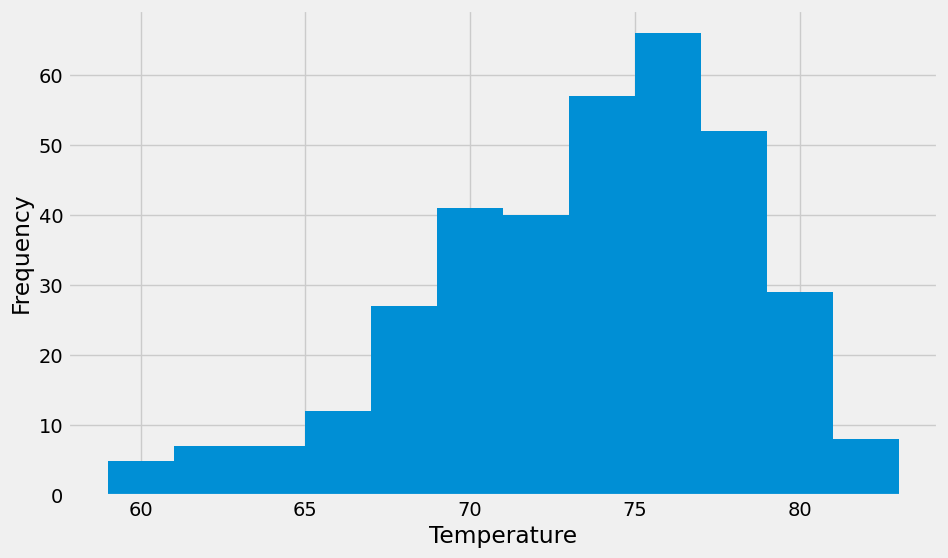

In [28]:
# Using the most active station id
most_active_station = session.query(Measurement.station, func.count(Measurement.station))\
                    .group_by(Measurement.station)\
                    .order_by(func.count(Measurement.station).desc())\
                    .first()[0]
# Query the last 12 months of temperature data for the most active station()
tobs_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= year_ago).all()

tobs_list = [temp[0] for temp in tobs_data]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(tobs_list, bins=12,)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [50]:
# Close Session
session.close()